# **Basic ridgeline plot (Joyplot)**

#### แสดงการกระจายของข้อมูลแบบตัวแปร numeric หลายๆกลุ่ม 

> #### ใช้ฟังก์ชั่น **ggridges**

Installing package into 'C:/Users/Lenovo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

Warning message:
"package 'ggridges' is in use and will not be installed"
Picking joint bandwidth of 458



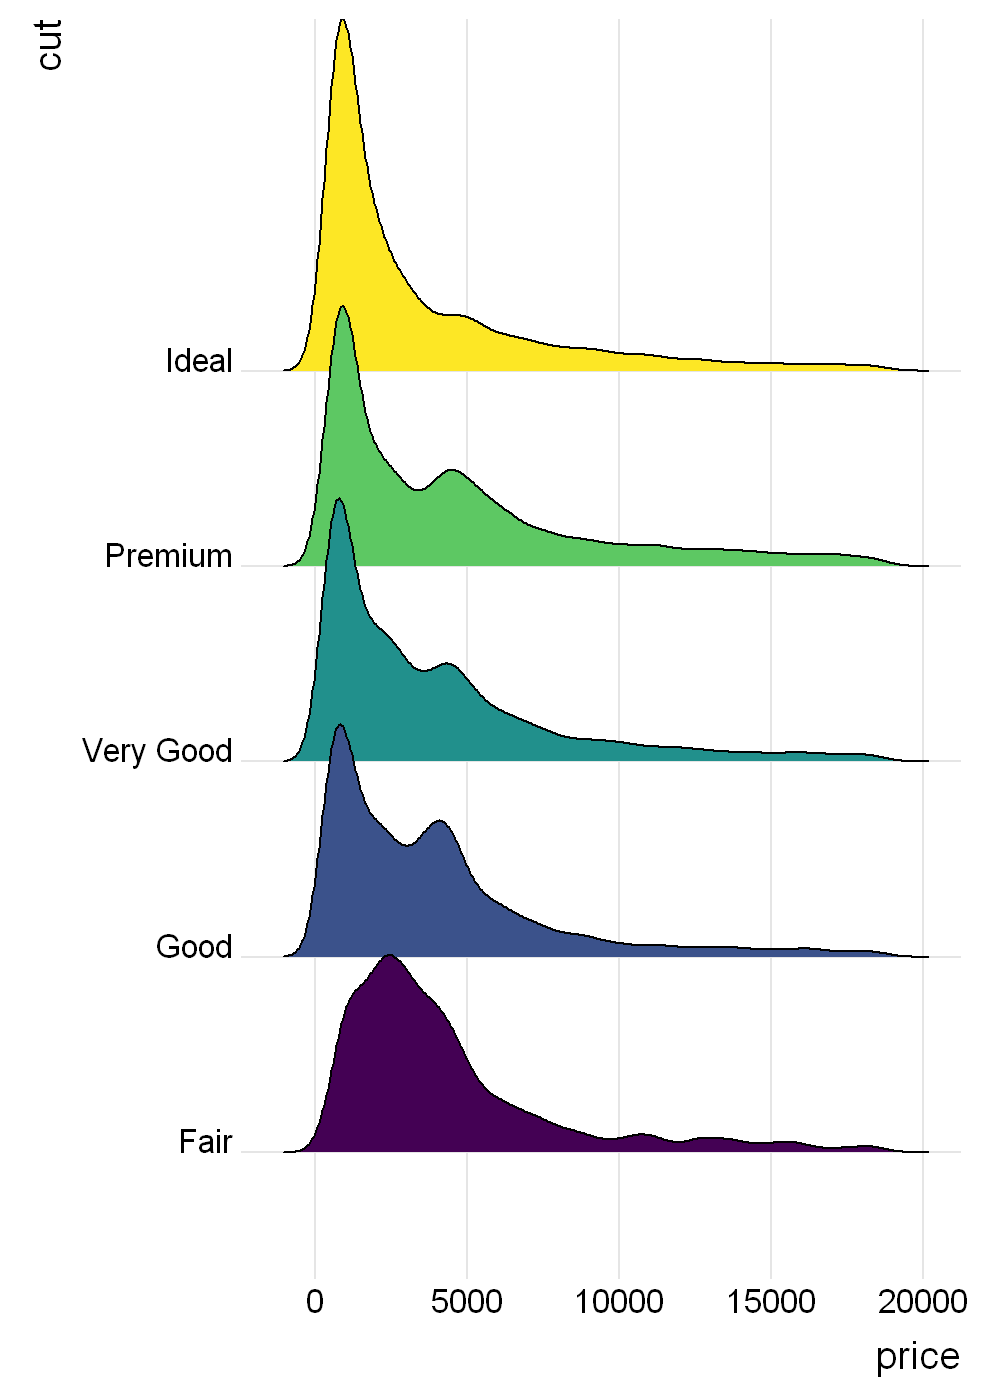

In [19]:
install.packages("ggridges")
# library
library(ggridges)
library(ggplot2)
 
# Diamonds dataset is provided by R natively
#head(diamonds)
 
# basic example
ggplot(diamonds, aes(x = price, y = cut, fill = cut)) +
  geom_density_ridges() +
  theme_ridges() + 
  theme(legend.position = "none") 

### **Shape Variation**

 #### เปลี่ยนรูปร่างของกราฟตามการกระจายข้อมูลของแต่ละข้อมูล

> #### ใช้ฟังก์ชั่น **stat="binline"**


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




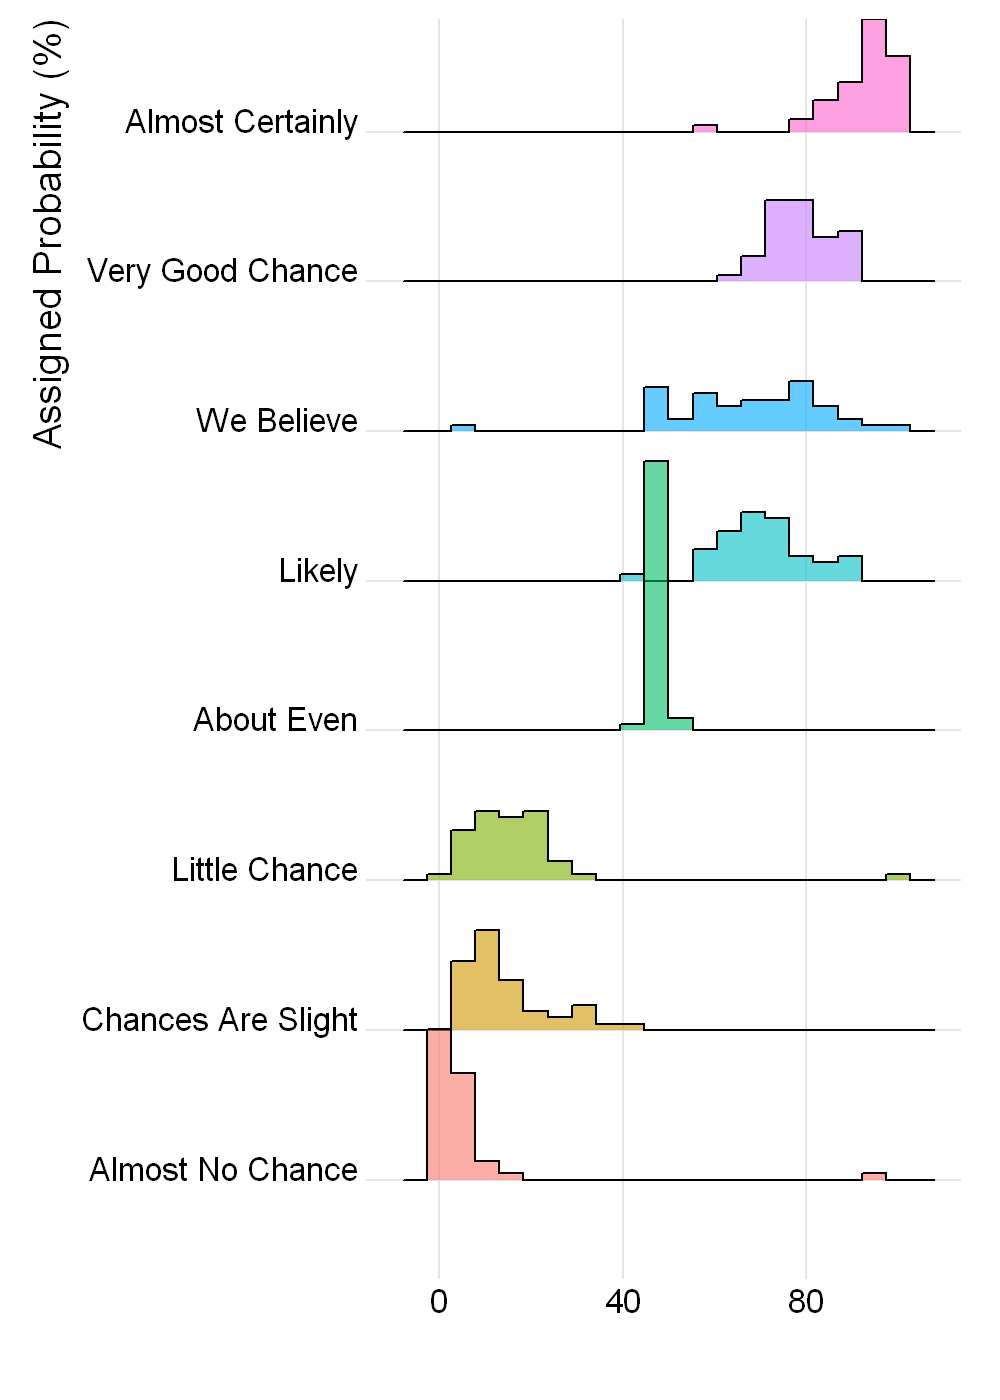

In [21]:
# library
library(ggridges)
library(ggplot2)
library(dplyr)
library(tidyr)
library(forcats)

# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv", header=TRUE, sep=",")
data <- data %>% 
  gather(key="text", value="value") %>%
  mutate(text = gsub("\\.", " ",text)) %>%
  mutate(value = round(as.numeric(value),0)) %>%
  filter(text %in% c("Almost Certainly","Very Good Chance","We Believe","Likely","About Even", "Little Chance", "Chances Are Slight", "Almost No Chance"))

# Plot
data %>%
  mutate(text = fct_reorder(text, value)) %>%
  ggplot( aes(y=text, x=value,  fill=text)) +
    geom_density_ridges(alpha=0.6, stat="binline", bins=20) +
    theme_ridges() +
    theme(
      legend.position="none",
      panel.spacing = unit(0.1, "lines"),
      strip.text.x = element_text(size = 8)
    ) +
    xlab("") +
    ylab("Assigned Probability (%)")

### **color relative value**

#### แสดงสีให้สัมพันธ์กับค่าของข้อมูล

Loading required package: viridisLite

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see http://bit.ly/arialnarrow

Picking joint bandwidth of 3.37

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds,

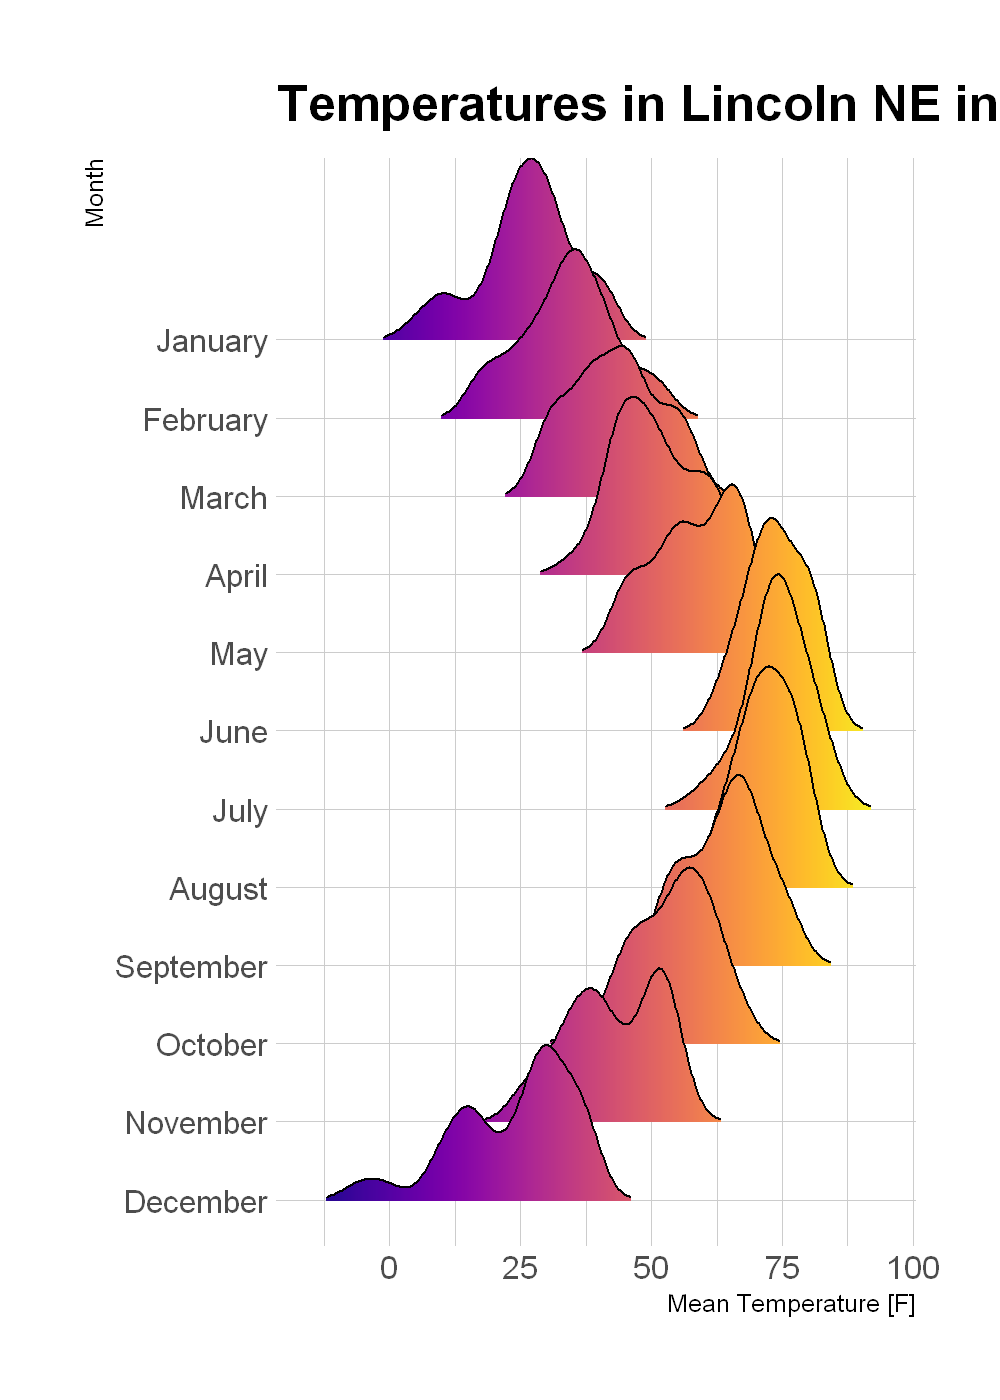

In [23]:
# library
library(ggridges)
library(ggplot2)
library(viridis)
library(hrbrthemes)

# Plot
ggplot(lincoln_weather, aes(x = `Mean Temperature [F]`, y = `Month`, fill = ..x..)) +
  geom_density_ridges_gradient(scale = 3, rel_min_height = 0.01) +
  scale_fill_viridis(name = "Temp. [F]", option = "C") +
  labs(title = 'Temperatures in Lincoln NE in 2016') +
  theme_ipsum() +
    theme(
      legend.position="none",
      panel.spacing = unit(0.1, "lines"),
      strip.text.x = element_text(size = 8)
    )